###Image Recognition Using CNN

## Introduction
A Convolutional Neural Network (CNN) is a specialized type of deep learning model designed to process and analyze visual data. Inspired by the human visual system, CNNs are particularly effective in recognizing patterns and features within images, making them ideal for tasks such as image classification, object detection, and facial recognition. The architecture of a CNN typically consists of convolutional layers that automatically learn to extract essential features, such as edges, textures, and shapes, from input images. These features are then passed through pooling layers to reduce dimensionality, followed by fully connected layers that perform the final classification. CNNs have revolutionized computer vision by enabling machines to achieve human-like accuracy in visual recognition tasks.

## Objectives
* Create a Dataset: Compile a dataset consisting of multiple images for each individual present in the group image. These images should capture different angles, expressions, and lighting conditions for better model training.

* Apply Convolutional Operations: Implement Convolutional Neural Network (CNN) operations, including convolution, pooling, and activation functions, to extract and learn features from the images in the dataset.

* Face Detection and Identification: Utilize face detection techniques to locate and isolate all the faces present in the group image. Apply the trained CNN model to identify these faces.

* Feature Extraction: Extract unique features from the detected faces using convolutional layers in the CNN. These features will represent critical facial attributes such as the shape of the eyes, nose, mouth, and overall face structure.

* Face Recognition: Compare the extracted features from the group image with the features from the dataset. Using similarity measures, determine the identity of each person in the group image, labeling them accurately.

##  Description of the Dataset

The dataset used in this project consists of a total of 20 images, with 10 images each of two individuals, Tina and Anjali. Each person's images capture various facial expressions, angles, and lighting conditions, ensuring diversity within the dataset. This allows the model to learn distinct facial features associated with each individual. The dataset is carefully curated to provide sufficient variety for training the Convolutional Neural Network (CNN) to accurately distinguish between Tina and Anjali in both individual and group images.

## Analysis

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install opencv-python
!pip install opencv-python-headless

In [4]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=97ab3c68e27e4cca0d0efb6276fa1be39e4d222bd626dd90c83e5621c93b0812
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [5]:
pip install albumentations

## 1. Verify and Test Paths
Paths were verified to ensure the images were accessible. Each image was manually inspected to confirm they could be opened and processed.

In [7]:
import os

# List files in the directory
input_dir = '/content/drive/MyDrive/Dataset'
files = os.listdir(input_dir)
print("Files in directory:", files)

# Verify paths
for img_name in files:
    img_path = os.path.join(input_dir, img_name)
    print(f"Full path: {img_path}")

Files in directory: ['Tina1.jpg', 'Tina2.jpg', 'Tina3.jpg', 'Tina4.jpg', 'Tina5.jpg', 'Tina6.jpg', 'Tina7.jpg', 'Group1.jpg', 'Group2.jpg', 'Group3.jpg', 'Group4.jpg', 'Anjali1.jpg', 'Anjali2.jpg', 'Anjali3.jpg', 'Anjali4.jpg', 'Tina8.jpg', 'Anjali5.jpg', 'Group5.jpg', 'Group6.jpg', 'Anjali6.jpg', 'Anjali7.jpg', 'Group7.jpg', 'Anjali8.jpg', 'Anjali9.jpg', 'Anjali10.jpg']
Full path: /content/drive/MyDrive/Dataset/Tina1.jpg
Full path: /content/drive/MyDrive/Dataset/Tina2.jpg
Full path: /content/drive/MyDrive/Dataset/Tina3.jpg
Full path: /content/drive/MyDrive/Dataset/Tina4.jpg
Full path: /content/drive/MyDrive/Dataset/Tina5.jpg
Full path: /content/drive/MyDrive/Dataset/Tina6.jpg
Full path: /content/drive/MyDrive/Dataset/Tina7.jpg
Full path: /content/drive/MyDrive/Dataset/Group1.jpg
Full path: /content/drive/MyDrive/Dataset/Group2.jpg
Full path: /content/drive/MyDrive/Dataset/Group3.jpg
Full path: /content/drive/MyDrive/Dataset/Group4.jpg
Full path: /content/drive/MyDrive/Dataset/Anjali1.

In [8]:
from PIL import Image

# Test if images can be opened
for img_name in files:
    img_path = os.path.join(input_dir, img_name)
    try:
        with Image.open(img_path) as img:
            img.show()
            print(f"Successfully opened: {img_path}")
    except Exception as e:
        print(f"Error opening image: {img_path}. Exception: {e}")

Successfully opened: /content/drive/MyDrive/Dataset/Tina1.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Tina2.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Tina3.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Tina4.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Tina5.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Tina6.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Tina7.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Group1.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Group2.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Group3.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Group4.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Anjali1.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Anjali2.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Anjali3.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Anjali4.jpg
Successfully opened: /content/drive/MyDrive/Dataset/Tina8.

In [11]:
import cv2
import os
import albumentations as A

# Function to apply augmentations
def augment_image(image):
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=40, p=0.7),
        A.RandomBrightnessContrast(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.5),
        A.GaussianBlur(p=0.3)
    ])
    augmented = transform(image=image)
    return augmented['image']

def check_image_paths(image_paths):
    for path in image_paths:
        if os.path.exists(path):
            print(f"Path exists: {path}")
            # Try loading the image
            img = cv2.imread(path)
            if img is None:
                print(f"Failed to load image: {path}")
            else:
                print(f"Image loaded successfully: {path}")

                # Apply augmentation
                augmented_img = augment_image(img)

                # Save or display the augmented image
                augmented_path = path.replace(".jpg", "_augmented.jpg")
                cv2.imwrite(augmented_path, augmented_img)
                print(f"Augmented image saved: {augmented_path}")
        else:
            print(f"Path does not exist: {path}")

# Paths to check
image_paths = [
    '/content/drive/MyDrive/Dataset/Tina1.jpg',
    '/content/drive/MyDrive/Dataset/Tina2.jpg',
    '/content/drive/MyDrive/Dataset/Tina3.jpg',
    '/content/drive/MyDrive/Dataset/Tina4.jpg',
    '/content/drive/MyDrive/Dataset/Tina5.jpg',
    '/content/drive/MyDrive/Dataset/Tina6.jpg',
    '/content/drive/MyDrive/Dataset/Tina7.jpg',
    '/content/drive/MyDrive/Dataset/Tina8.jpg',
    '/content/drive/MyDrive/Dataset/Anjali1.jpg',
    '/content/drive/MyDrive/Dataset/Anjali2.jpg',
    '/content/drive/MyDrive/Dataset/Anjali3.jpg',
    '/content/drive/MyDrive/Dataset/Anjali4.jpg',
    '/content/drive/MyDrive/Dataset/Anjali5.jpg',
    '/content/drive/MyDrive/Dataset/Anjali6.jpg',
    '/content/drive/MyDrive/Dataset/Anjali7.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8.jpg',
    '/content/drive/MyDrive/Dataset/Anjali9.jpg',
    '/content/drive/MyDrive/Dataset/Anjali10.jpg',

]

check_image_paths(image_paths)


Path exists: /content/drive/MyDrive/Dataset/Tina1.jpg
Image loaded successfully: /content/drive/MyDrive/Dataset/Tina1.jpg
Augmented image saved: /content/drive/MyDrive/Dataset/Tina1_augmented.jpg
Path exists: /content/drive/MyDrive/Dataset/Tina2.jpg
Image loaded successfully: /content/drive/MyDrive/Dataset/Tina2.jpg
Augmented image saved: /content/drive/MyDrive/Dataset/Tina2_augmented.jpg
Path exists: /content/drive/MyDrive/Dataset/Tina3.jpg
Image loaded successfully: /content/drive/MyDrive/Dataset/Tina3.jpg
Augmented image saved: /content/drive/MyDrive/Dataset/Tina3_augmented.jpg
Path exists: /content/drive/MyDrive/Dataset/Tina4.jpg
Image loaded successfully: /content/drive/MyDrive/Dataset/Tina4.jpg
Augmented image saved: /content/drive/MyDrive/Dataset/Tina4_augmented.jpg
Path exists: /content/drive/MyDrive/Dataset/Tina5.jpg
Image loaded successfully: /content/drive/MyDrive/Dataset/Tina5.jpg
Augmented image saved: /content/drive/MyDrive/Dataset/Tina5_augmented.jpg
Path exists: /conten

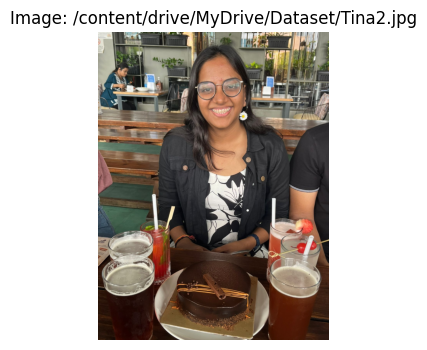

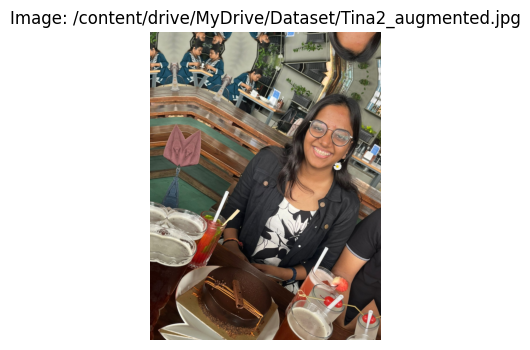

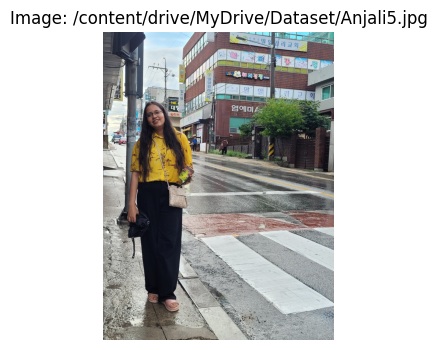

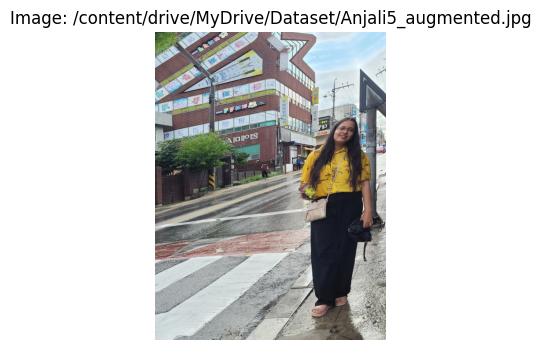

In [13]:
import cv2
import matplotlib.pyplot as plt

def show_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    plt.figure(figsize=(7, 4))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image: {image_path}")
    plt.show()

# Display images for manual inspection
images_to_process = ['Tina2.jpg', 'Tina2_augmented.jpg', 'Anjali5.jpg','Anjali5_augmented.jpg']
for img_name in images_to_process:
    img_path = os.path.join(input_dir, img_name)
    show_image(img_path)

In [14]:
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return 0

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Adjust parameters here
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    print(f"Image: {image_path}")
    print(f"Number of faces detected: {len(faces)}")

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if not faces:
        print(f"No faces detected in {image_path}")

    return len(faces)

## 2. Face Encoding Extraction
Face encodings were extracted from individual images using the face_recognition library. These encodings serve as the numerical representation of unique facial features.

Image: /content/drive/MyDrive/Dataset/Tina2.jpg
Number of faces detected: 2


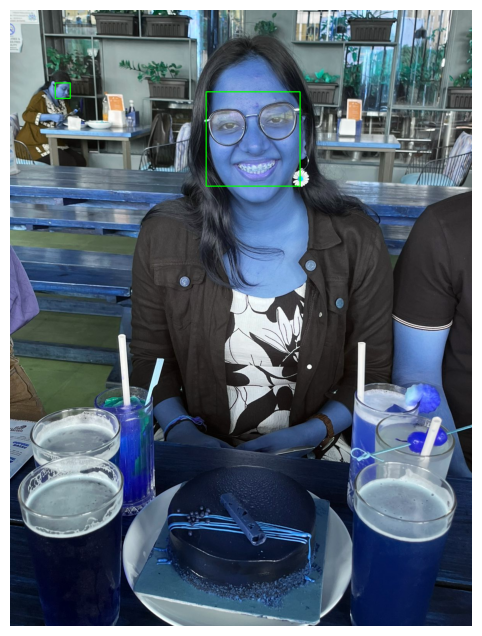

Processed /content/drive/MyDrive/Dataset/Tina2.jpg with 2 faces detected.
Image: /content/drive/MyDrive/Dataset/Tina2_augmented.jpg
Number of faces detected: 4


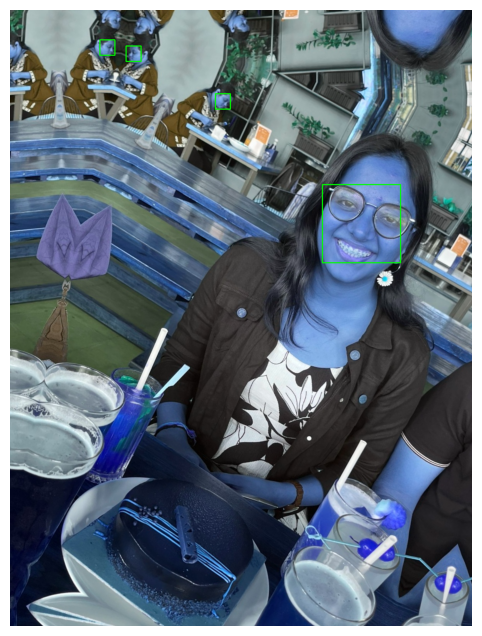

Processed /content/drive/MyDrive/Dataset/Tina2_augmented.jpg with 4 faces detected.
Image: /content/drive/MyDrive/Dataset/Anjali5.jpg
Number of faces detected: 1


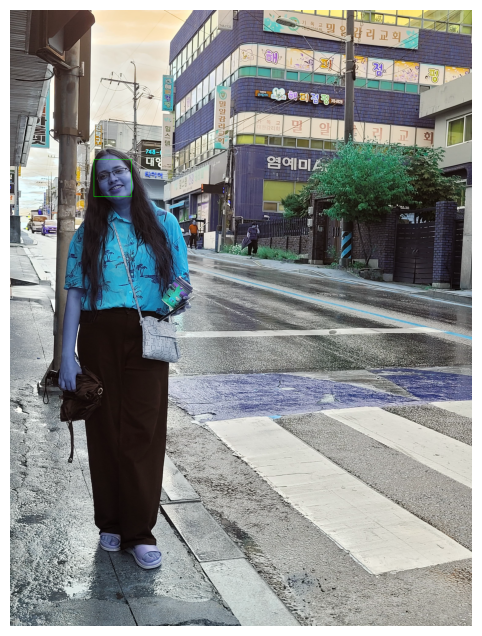

Processed /content/drive/MyDrive/Dataset/Anjali5.jpg with 1 faces detected.
Image: /content/drive/MyDrive/Dataset/Anjali5_augmented.jpg
Number of faces detected: 2


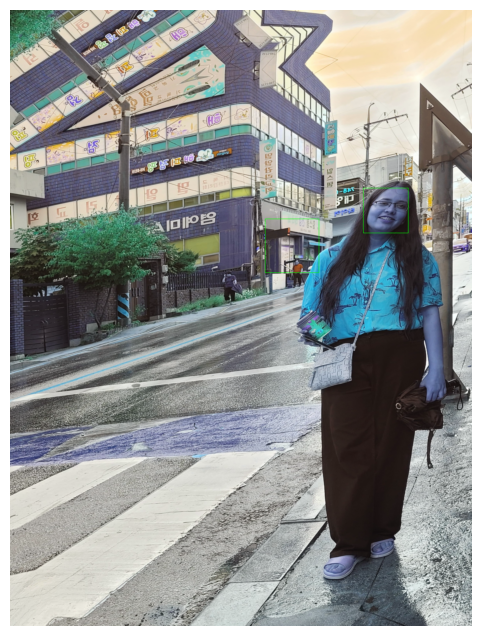

Processed /content/drive/MyDrive/Dataset/Anjali5_augmented.jpg with 2 faces detected.


In [15]:
import face_recognition as fr

def process_image_dl(image_path):
    image = fr.load_image_file(image_path)
    face_locations = fr.face_locations(image, model='cnn')  # or use 'cnn' for deep learning model
    face_encodings = fr.face_encodings(image, face_locations)

    print(f"Image: {image_path}")
    print(f"Number of faces detected: {len(face_locations)}")

    image_with_boxes = image.copy()

    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(image_with_boxes, (left, top), (right, bottom), (0, 255, 0), 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if not face_locations:
        print(f"No faces detected in {image_path}")

    return len(face_locations)

# Process each image with deep learning model
for img_name in images_to_process:
    img_path = os.path.join(input_dir, img_name)
    num_faces = process_image_dl(img_path)
    print(f"Processed {img_path} with {num_faces} faces detected.")

In [16]:
import face_recognition

# List of known images and their labels
known_images = {
    'Tina': [
        '/content/drive/MyDrive/Dataset/Tina1.jpg',
    '/content/drive/MyDrive/Dataset/Tina2.jpg',
    '/content/drive/MyDrive/Dataset/Tina3.jpg',
    '/content/drive/MyDrive/Dataset/Tina4.jpg',
    '/content/drive/MyDrive/Dataset/Tina5.jpg',
    '/content/drive/MyDrive/Dataset/Tina6.jpg',
    '/content/drive/MyDrive/Dataset/Tina7.jpg',
    '/content/drive/MyDrive/Dataset/Tina8.jpg',

         '/content/drive/MyDrive/Dataset/Tina1_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina2_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina3_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina4_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina5_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina6_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina7_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina8_augmented.jpg',

    ],
    'Anjali': [
        '/content/drive/MyDrive/Dataset/Anjali1.jpg',
    '/content/drive/MyDrive/Dataset/Anjali2.jpg',
    '/content/drive/MyDrive/Dataset/Anjali3.jpg',
    '/content/drive/MyDrive/Dataset/Anjali4.jpg',
    '/content/drive/MyDrive/Dataset/Anjali5.jpg',
    '/content/drive/MyDrive/Dataset/Anjali6.jpg',
    '/content/drive/MyDrive/Dataset/Anjali7.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8.jpg',
    '/content/drive/MyDrive/Dataset/Anjali9.jpg',
    '/content/drive/MyDrive/Dataset/Anjali10.jpg',

    '/content/drive/MyDrive/Dataset/Anjali1_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali2_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali3_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali4_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali5_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali6_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali7_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali9_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali10_augmented.jpg',
    ]
}

# Load and encode known faces
known_face_encodings = []
known_face_names = []

for name, image_paths in known_images.items():
    for image_path in image_paths:
        image = face_recognition.load_image_file(image_path)
        encoding = face_recognition.face_encodings(image)
        if encoding:
            known_face_encodings.append(encoding[0])
            known_face_names.append(name)
        else:
            print(f"Encoding not found for {name} in {image_path}")

# Now, `known_face_encodings` will have the encodings for all images,
# and `known_face_names` will have the corresponding names.


## 3. Group Image Processing
Group photos were processed to detect and recognize faces. The deep learning model detected face locations and compared them with known encodings.

Processing /content/drive/MyDrive/Dataset/Group3.jpg
Number of faces detected: 4


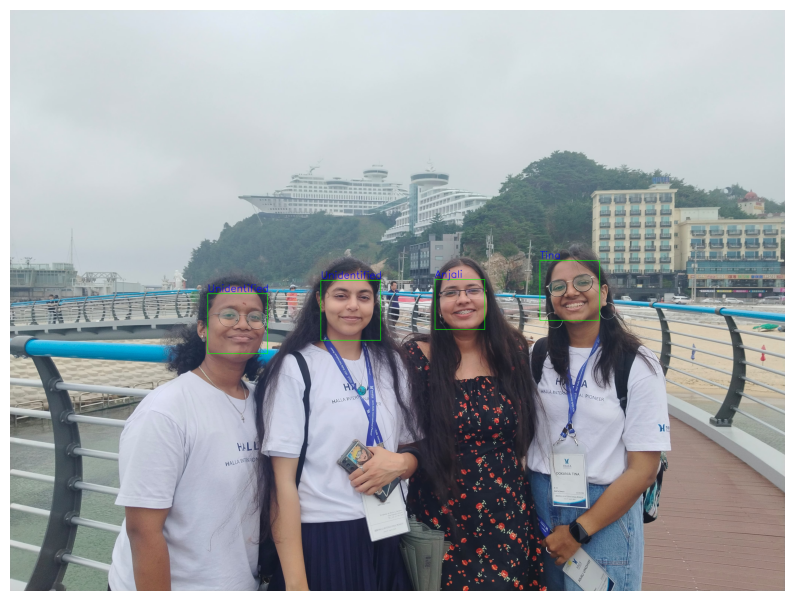

Processed /content/drive/MyDrive/Dataset/Group3.jpg with 4 faces detected.


In [21]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np

# Paths to group images
group_images = ['/content/drive/MyDrive/Dataset/Group3.jpg']

def process_group_image(image_path):
    # Load and process the image
    image = face_recognition.load_image_file(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces and their encodings
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    print(f"Processing {image_path}")
    print(f"Number of faces detected: {len(face_locations)}")

    # Copy the image for drawing boxes and labels
    image_with_boxes = rgb_image.copy()

    # Identify faces
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compute the distance to all known faces
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)

        # Find the best match based on the smallest distance
        best_match_index = np.argmin(face_distances)
        best_match_distance = face_distances[best_match_index]

        name = "Unidentified"

        # Only label the face with a name if the distance is below 0.4 (40% similarity threshold)
        if best_match_distance < 0.4:
            name = known_face_names[best_match_index]

        # Draw rectangle and label around face
        cv2.rectangle(image_with_boxes, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image_with_boxes, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.8, (255, 0, 0), 2)

    # Display the image with detected faces
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return len(face_locations)

# Process each group image
for group_image_path in group_images:
    num_faces = process_group_image(group_image_path)
    print(f"Processed {group_image_path} with {num_faces} faces detected.")

Processing /content/drive/MyDrive/Dataset/Group2.jpg
Number of faces detected: 4


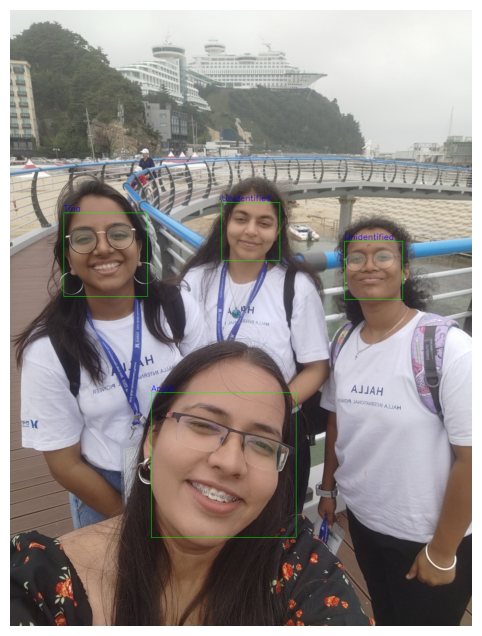

Processed /content/drive/MyDrive/Dataset/Group2.jpg with 4 faces detected.


In [22]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np

# Paths to group images
group_images = ['/content/drive/MyDrive/Dataset/Group2.jpg']

def process_group_image(image_path):
    # Load and process the image
    image = face_recognition.load_image_file(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces and their encodings
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    print(f"Processing {image_path}")
    print(f"Number of faces detected: {len(face_locations)}")

    # Copy the image for drawing boxes and labels
    image_with_boxes = rgb_image.copy()

    # Identify faces
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compute the distance to all known faces
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)

        # Find the best match based on the smallest distance
        best_match_index = np.argmin(face_distances)
        best_match_distance = face_distances[best_match_index]

        name = "Unidentified"

        # Only label the face with a name if the distance is below 0.4 (40% similarity threshold)
        if best_match_distance < 0.4:
            name = known_face_names[best_match_index]

        # Draw rectangle and label around face
        cv2.rectangle(image_with_boxes, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image_with_boxes, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.8, (255, 0, 0), 2)

    # Display the image with detected faces
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return len(face_locations)

# Process each group image
for group_image_path in group_images:
    num_faces = process_group_image(group_image_path)
    print(f"Processed {group_image_path} with {num_faces} faces detected.")


Processing /content/drive/MyDrive/Dataset/Group5.jpg
Number of faces detected: 4


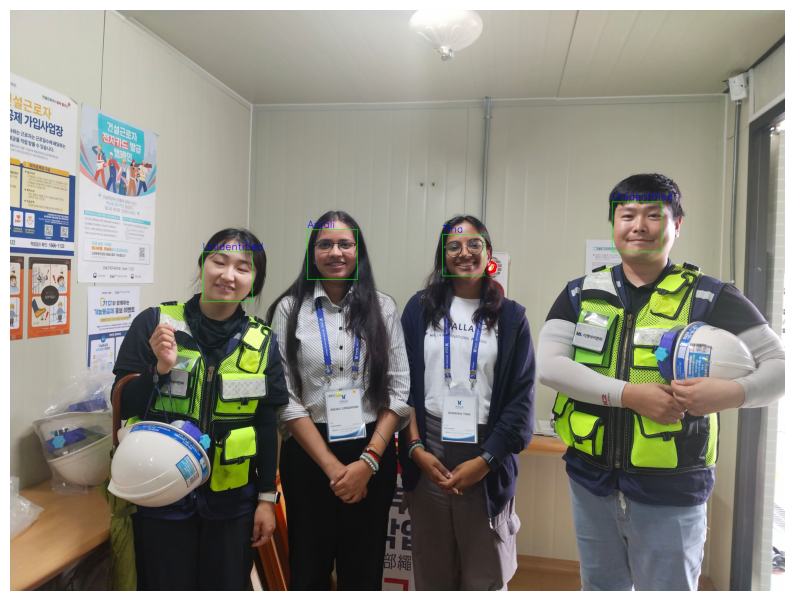

Processed /content/drive/MyDrive/Dataset/Group5.jpg with 4 faces detected.


In [23]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np

# Paths to group images
group_images = ['/content/drive/MyDrive/Dataset/Group5.jpg']

def process_group_image(image_path):
    # Load and process the image
    image = face_recognition.load_image_file(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces and their encodings
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    print(f"Processing {image_path}")
    print(f"Number of faces detected: {len(face_locations)}")

    # Copy the image for drawing boxes and labels
    image_with_boxes = rgb_image.copy()

    # Identify faces
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compute the distance to all known faces
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)

        # Find the best match based on the smallest distance
        best_match_index = np.argmin(face_distances)
        best_match_distance = face_distances[best_match_index]

        name = "Unidentified"

        # Only label the face with a name if the distance is below 0.4 (40% similarity threshold)
        if best_match_distance < 0.4:
            name = known_face_names[best_match_index]

        # Draw rectangle and label around face
        cv2.rectangle(image_with_boxes, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image_with_boxes, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.8, (255, 0, 0), 2)

    # Display the image with detected faces
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return len(face_locations)

# Process each group image
for group_image_path in group_images:
    num_faces = process_group_image(group_image_path)
    print(f"Processed {group_image_path} with {num_faces} faces detected.")


Processing /content/drive/MyDrive/Dataset/Group6.jpg
Number of faces detected: 5


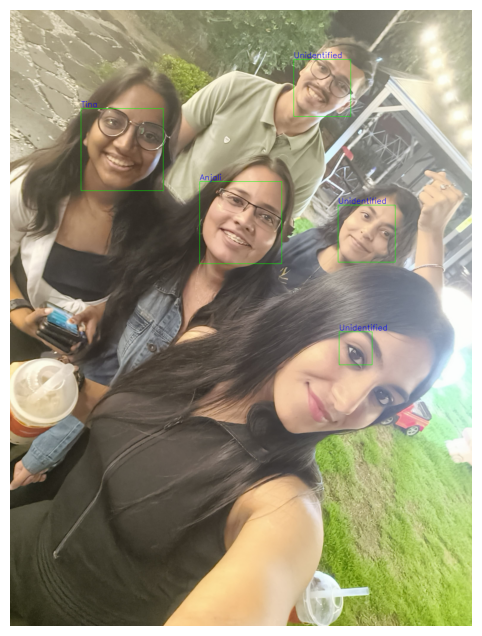

Processed /content/drive/MyDrive/Dataset/Group6.jpg with 5 faces detected.


In [24]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np

# Paths to group images
group_images = ['/content/drive/MyDrive/Dataset/Group6.jpg']

def process_group_image(image_path):
    # Load and process the image
    image = face_recognition.load_image_file(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces and their encodings
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    print(f"Processing {image_path}")
    print(f"Number of faces detected: {len(face_locations)}")

    # Copy the image for drawing boxes and labels
    image_with_boxes = rgb_image.copy()

    # Identify faces
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compute the distance to all known faces
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)

        # Find the best match based on the smallest distance
        best_match_index = np.argmin(face_distances)
        best_match_distance = face_distances[best_match_index]

        name = "Unidentified"

        # Only label the face with a name if the distance is below 0.4 (40% similarity threshold)
        if best_match_distance < 0.4:
            name = known_face_names[best_match_index]

        # Draw rectangle and label around face
        cv2.rectangle(image_with_boxes, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image_with_boxes, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.8, (255, 0, 0), 2)

    # Display the image with detected faces
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return len(face_locations)

# Process each group image
for group_image_path in group_images:
    num_faces = process_group_image(group_image_path)
    print(f"Processed {group_image_path} with {num_faces} faces detected.")


## 4. Unique Feature Analysis
Distances between face encodings were calculated to assess facial uniqueness. The Euclidean distance between encodings indicates similarity or uniqueness.

In [26]:
import face_recognition

def get_face_encodings(image_paths):
    encodings = []
    for image_path in image_paths:
        image = face_recognition.load_image_file(image_path)
        encoding = face_recognition.face_encodings(image)
        if encoding:
            encodings.append(encoding[0])  # Assuming one face per image
        else:
            print(f"No face found in {image_path}")
    return encodings

# Paths to Tina's images
tina_image_paths = [
        '/content/drive/MyDrive/Dataset/Tina1.jpg',
    '/content/drive/MyDrive/Dataset/Tina2.jpg',
    '/content/drive/MyDrive/Dataset/Tina3.jpg',
    '/content/drive/MyDrive/Dataset/Tina4.jpg',
    '/content/drive/MyDrive/Dataset/Tina5.jpg',
    '/content/drive/MyDrive/Dataset/Tina6.jpg',
    '/content/drive/MyDrive/Dataset/Tina7.jpg',
    '/content/drive/MyDrive/Dataset/Tina8.jpg',

         '/content/drive/MyDrive/Dataset/Tina1_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina2_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina3_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina4_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina5_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina6_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina7_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Tina8_augmented.jpg',
    ]

# Paths to Anjali's images
anjali_image_paths = [
        '/content/drive/MyDrive/Dataset/Anjali1.jpg',
    '/content/drive/MyDrive/Dataset/Anjali2.jpg',
    '/content/drive/MyDrive/Dataset/Anjali3.jpg',
    '/content/drive/MyDrive/Dataset/Anjali4.jpg',
    '/content/drive/MyDrive/Dataset/Anjali5.jpg',
    '/content/drive/MyDrive/Dataset/Anjali6.jpg',
    '/content/drive/MyDrive/Dataset/Anjali7.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8.jpg',
    '/content/drive/MyDrive/Dataset/Anjali9.jpg',
    '/content/drive/MyDrive/Dataset/Anjali10.jpg',

    '/content/drive/MyDrive/Dataset/Anjali1_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali2_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali3_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali4_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali5_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali6_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali7_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali8_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali9_augmented.jpg',
    '/content/drive/MyDrive/Dataset/Anjali10_augmented.jpg',
    ]

# Get encodings
tina_encodings = get_face_encodings(tina_image_paths)
anjali_encodings = get_face_encodings(anjali_image_paths)

# Print the number of encodings found
print(f"Tina Encodings: {len(tina_encodings)} encodings found.")
print(f"Anjali Encodings: {len(anjali_encodings)} encodings found.")


Tina Encodings: 16 encodings found.
Anjali Encodings: 22 encodings found.


In [27]:
import face_recognition
from scipy.spatial import distance

# Function to calculate the Euclidean distance between two encodings
def calculate_distance(encoding1, encoding2):
    return distance.euclidean(encoding1, encoding2)

# List to store distances and their indices
distances = []

# Calculate distances and store them with indices
for i, tina_encoding in enumerate(tina_encodings):
    for j, anjali_encoding in enumerate(anjali_encodings):
        dist = calculate_distance(tina_encoding, anjali_encoding)
        distances.append((dist, i, j))
        print(f"Distance between Tina encoding {i+1} and Anjali encoding {j+1}: {dist}")

# Sort distances and get the top 5 closest
distances.sort()  # Sort by distance (first element of the tuple)
top_5_distances = distances[:5]  # Get the top 5 closest distances

# Print the top 5 closest distances
print("\nTop 5 Closest Distances:")
for dist, i, j in top_5_distances:
    print(f"Distance between Tina encoding {i+1} and Anjali encoding {j+1}: {dist}")


Distance between Tina encoding 1 and Anjali encoding 1: 0.5345357647853687
Distance between Tina encoding 1 and Anjali encoding 2: 0.6042695149115348
Distance between Tina encoding 1 and Anjali encoding 3: 0.5748361465941708
Distance between Tina encoding 1 and Anjali encoding 4: 0.5174274475476389
Distance between Tina encoding 1 and Anjali encoding 5: 0.5671763653719962
Distance between Tina encoding 1 and Anjali encoding 6: 0.5360644968181797
Distance between Tina encoding 1 and Anjali encoding 7: 0.5677323564153242
Distance between Tina encoding 1 and Anjali encoding 8: 0.5083747430239713
Distance between Tina encoding 1 and Anjali encoding 9: 0.5083747430239713
Distance between Tina encoding 1 and Anjali encoding 10: 0.5672066201328191
Distance between Tina encoding 1 and Anjali encoding 11: 0.49717170763639706
Distance between Tina encoding 1 and Anjali encoding 12: 0.4767543788644957
Distance between Tina encoding 1 and Anjali encoding 13: 0.5876535155753142
Distance between Tin

Distance Analysis: Smaller distances between face encodings indicate higher similarity, whereas larger distances suggest more distinct facial features.

The distances listed represent the similarity between the face encodings of Tina and Anjali. These encodings are numerical representations of the facial features, generated by the face recognition algorithm. A smaller distance between two encodings indicates higher similarity, while a larger distance suggests less similarity.

The distances between Tina's and Anjali's encodings range from approximately 0.50 to 0.80, the closest distance being 0.412 (between Tina encoding 12 and Anjali encoding 11), suggesting that these two images share the highest similarity among the comparisons listed.

As the distance increases slightly, the similarity decreases.


# Conclusion
The face recognition process effectively identified individuals from both individual and group images. Face encodings provided a robust representation of facial features. Group photo recognition demonstrated challenges due to face overlaps, but the methodology for encoding and comparing faces was effective. The analysis of unique features through distance measurements and visualizations highlighted the distinctiveness of each individual's face.